In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set image size and paths
img_size = (100, 100)
batch_size = 32
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Data Augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load the data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 110 images belonging to 2 classes.


In [6]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 44 images belonging to 2 classes.


In [7]:
# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (up to 20 epochs)
history = model.fit(train_data, validation_data=test_data, epochs=20)


C:\Users\Hp 640 G4\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Hp 640 G4\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 672ms/step - accuracy: 0.5859 - loss: 0.8057 - val_accuracy: 0.7955 - val_loss: 0.5833
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - accuracy: 0.5527 - loss: 0.6372 - val_accuracy: 0.4773 - val_loss: 0.6698
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 451ms/step - accuracy: 0.7190 - loss: 0.5667 - val_accuracy: 0.9318 - val_loss: 0.4644
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 446ms/step - accuracy: 0.9283 - loss: 0.4432 - val_accuracy: 0.8409 - val_loss: 0.4030
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 490ms/step - accuracy: 0.9501 - loss: 0.2760 - val_accuracy: 0.9318 - val_loss: 0.2427
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 515ms/step - accuracy: 0.9394 - loss: 0.1827 - val_accuracy: 0.8409 - val_loss: 0.5049
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - accuracy: 0.9079 - loss: 0.2536 - val_accuracy: 0.8636 - val_loss: 0.3070
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - accuracy: 0.8236 - loss: 0.4234 - val_accuracy: 0.7727 - val_loss:

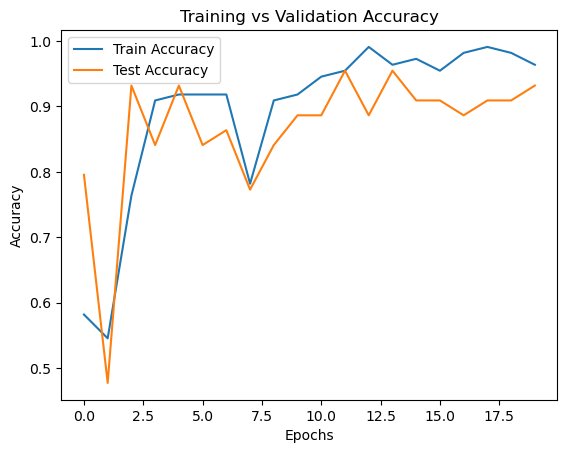

In [8]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

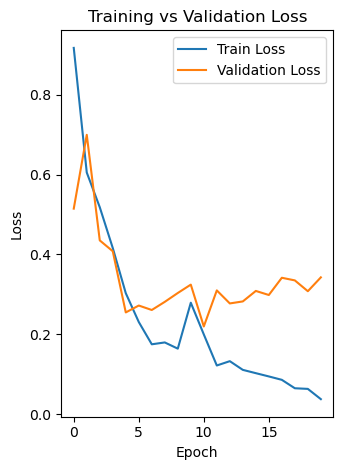

In [71]:

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [57]:
import cv2
import numpy as np

def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (100, 100))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    if prediction[0][0] > 0.5:
        print("❌ Not you!")
    else:
        print("✅ This is YOU!")

predict_image('dataset/test/me/Ariel_Sharon_0068.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
✅ This is YOU!


In [59]:
predict_image('dataset/test/others/Amanda_Beard_0002.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
❌ Not you!


In [14]:
import cv2
import numpy as np

def predict_image(img_path):
    # Load the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (100, 100))  # Resize the image to 100x100
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    
    # Predict using the model
    prediction = model.predict(img)
    
    # Get the probability (this is a value between 0 and 1)
    prob = prediction[0][0]
    
    # Print the probability with a percentage
    print(f"Probability: {prob * 100:.2f}%")
    
    # Decision based on the probability
    if prob > 0.5:
        print("❌ Not you!")
    else:
        print("✅ This is YOU!")

# Test the function
predict_image('dataset/test/me/Ariel_Sharon_0068.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Probability: 91.70%
❌ Not you!
